<a href="https://colab.research.google.com/github/yesmrsamuel/Django-Site-For-Watching-and-Downloading-Movie/blob/main/Overlay_text_precisely_on_images_using_Python_and_Moviepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Ramsri Goutham](https://twitter.com/ramsri_goutham)

In [ ]:
!pip install moviepy==2.0.0.dev2
!pip install imageio==2.25.1

In [ ]:
!apt install imagemagick

In [ ]:
!cat /etc/ImageMagick-6/policy.xml | sed 's/none/read,write/g'> /etc/ImageMagick-6/policy.xml

If the below code fails, download image from here (993x1280) resolution: https://pixabay.com/photos/bird-hummingbird-ornithology-8130023/




In [ ]:
!wget	"https://cdn.pixabay.com/photo/2023/07/16/04/14/bird-8130023_960_720.png"

In [ ]:
imagefile = 'bird-8130023_960_720.png'

(720, 559, 3)


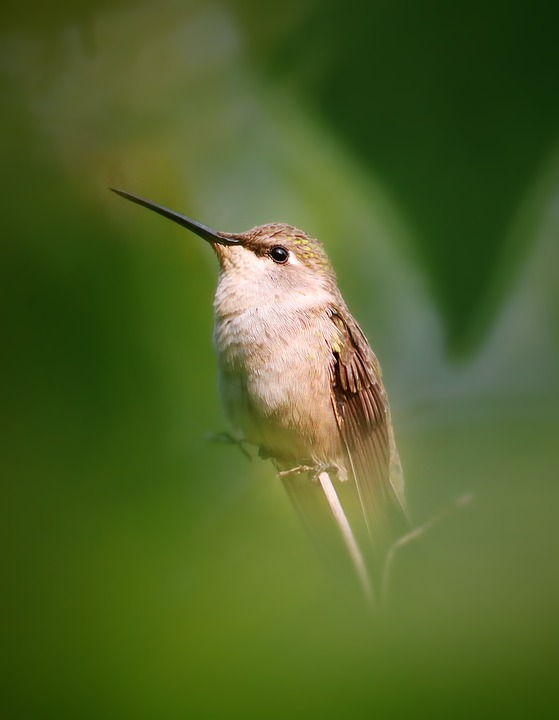

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img_color = cv2.imread(imagefile,1)
print (img_color.shape)
cv2_imshow(img_color)

In [ ]:
from moviepy.editor import TextClip, ImageClip, CompositeVideoClip, ColorClip, VideoClip

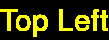

(109, 40)


In [ ]:
# The size of textclip changes with change in fontsize, font etc
topleft = TextClip("Top Left", fontsize=30, color='yellow', font='Arial')
topleft.save_frame('topleft.png')
cv2_imshow(cv2.imread('topleft.png'))
print (topleft.size)

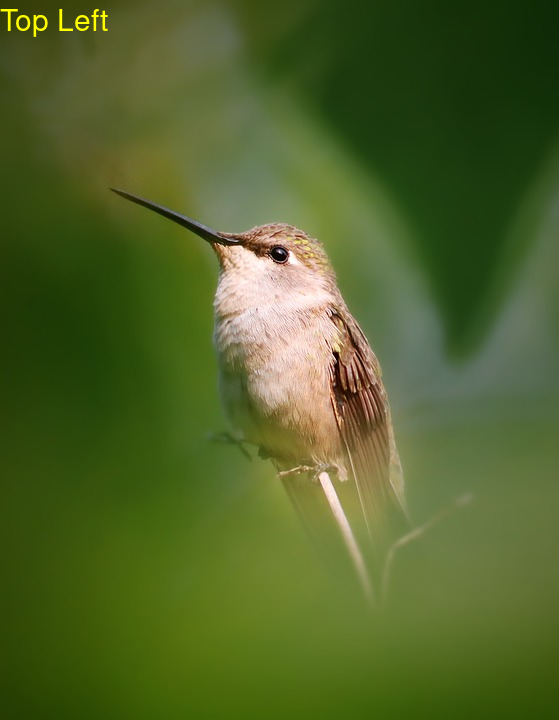

In [ ]:
image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, topleft])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))

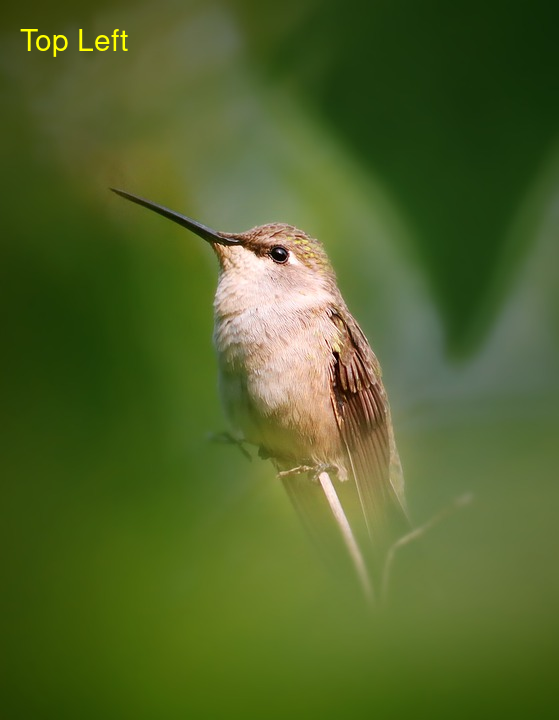

In [ ]:
# Move topleft a little bit to the right and bottom
padding = 20
topleft = TextClip("Top Left", fontsize=30, color='yellow', font='Arial')
topleft = topleft.set_position((padding,padding))

# center,left,right,top,bottom
# topleft = topleft.set_position('bottom')

image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, topleft])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))


In [ ]:
image_width , image_height = image_clip.size
print (image_width)
print (image_height)

559
720


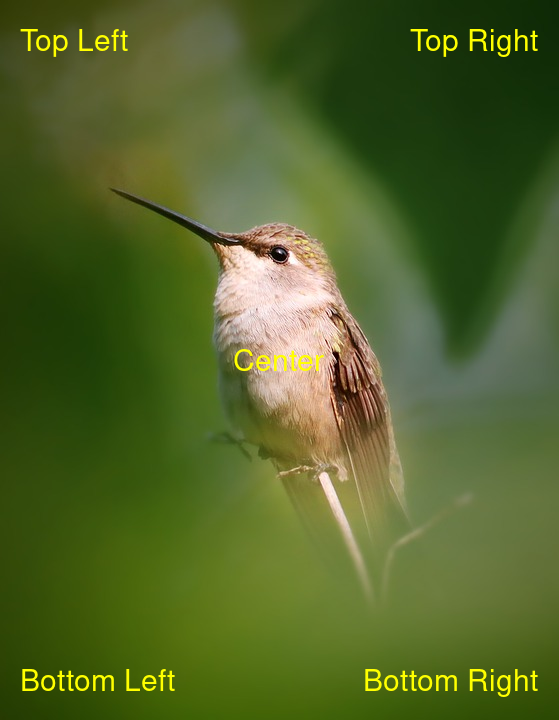

In [ ]:
# Add text on all four corners and center

padding = 20

# Top left
topleft = TextClip("Top Left", fontsize=30, color='yellow', font='Arial')
topleft = topleft.set_position((20,20))

# Top right
topright = TextClip("Top Right", fontsize=30, color='yellow', font='Arial')
topright_width , topright_height = topright.size
topright = topright.set_position((image_width-topright_width-padding,padding))

# Bottom Left
bottomleft = TextClip("Bottom Left", fontsize=30, color='yellow', font='Arial')
bottomleft_width , bottomleft_height = bottomleft.size
bottomleft = bottomleft.set_position((padding,image_height-bottomleft_height-padding))

# Bottom Right
bottomright = TextClip("Bottom Right", fontsize=30, color='yellow', font='Arial')
bottomright_width , bottomright_height = bottomright.size
bottomright = bottomright.set_position((image_width-bottomright_width-padding,image_height-bottomleft_height-padding))

# Center
center = TextClip("Center", fontsize=30, color='yellow', font='Arial')
center_width , center_height = center.size
center = center.set_position((image_width/2-center_width/2,image_height/2-center_height/2))

image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, topleft, topright, bottomleft, bottomright, center])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))

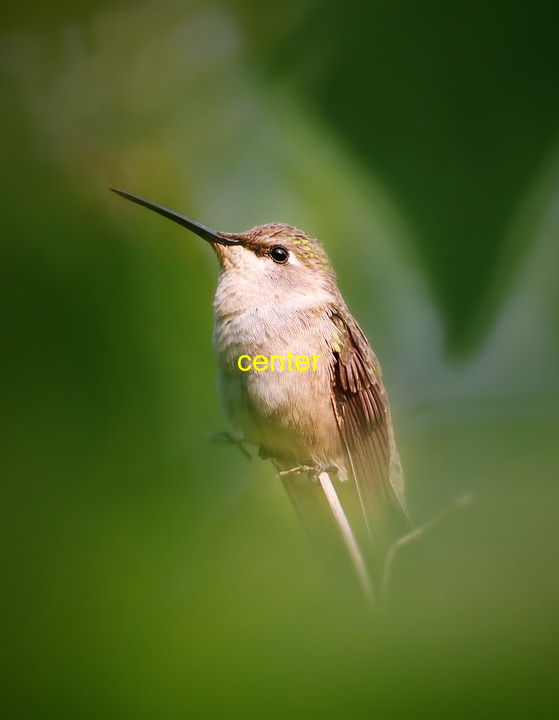

In [ ]:

# Center
center = TextClip("center", fontsize=30, color='yellow', font='Arial')
center_width , center_height = center.size
center = center.set_position((image_width/2-center_width/2,image_height/2-center_height/2))

image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, center])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))

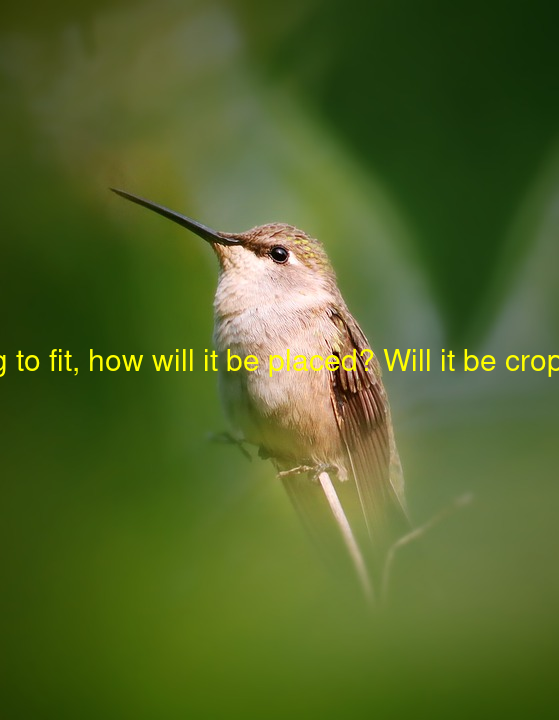

In [ ]:

# Center
center = TextClip("If Center is too long to fit, how will it be placed? Will it be cropped or shortened?", fontsize=30, color='yellow', font='Arial')
center_width , center_height = center.size
center = center.set_position((image_width/2-center_width/2,image_height/2-center_height/2))

image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, center])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))

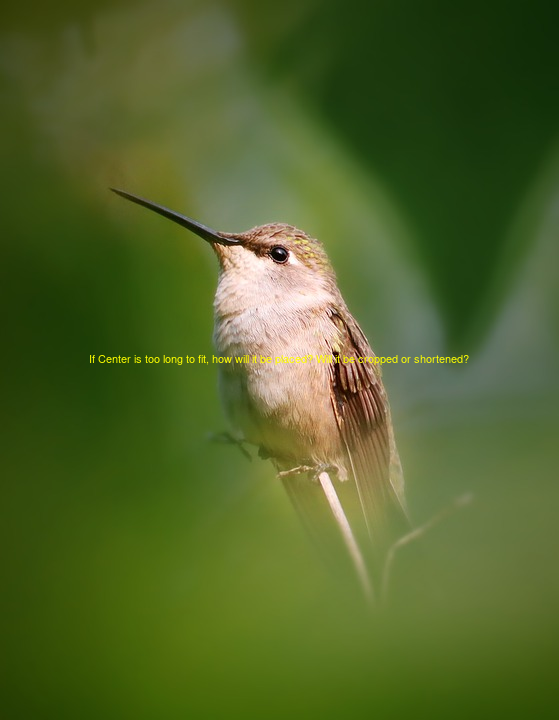

In [ ]:
# Center
center = TextClip("If Center is too long to fit, how will it be placed? Will it be cropped or shortened?", fontsize=30, color='yellow', font='Arial',
                  size = (image_width*0.8,None))
center_width , center_height = center.size
center = center.set_position((image_width/2-center_width/2,image_height/2-center_height/2))

image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, center])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))


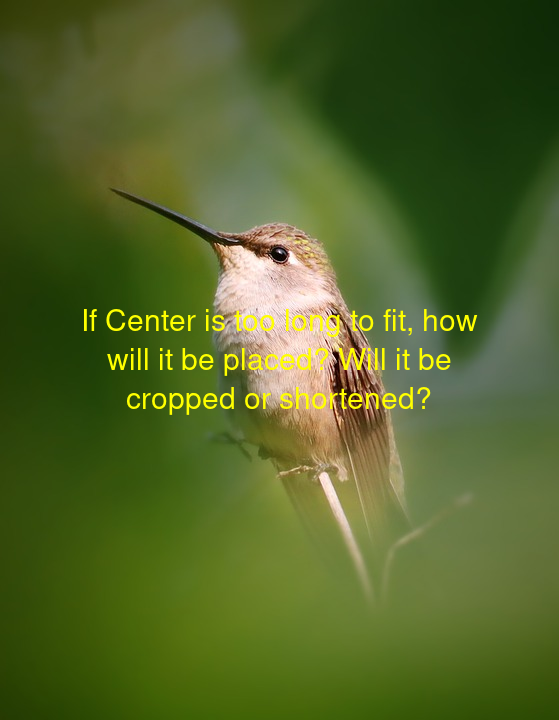

In [ ]:
# Center
center = TextClip("If Center is too long to fit, how will it be placed? Will it be cropped or shortened?",
                  fontsize=30, color='yellow', font='Arial', size = (image_width*0.8,None),method='caption')
center_width , center_height = center.size
center = center.set_position((image_width/2-center_width/2,image_height/2-center_height/2))

image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, center])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))

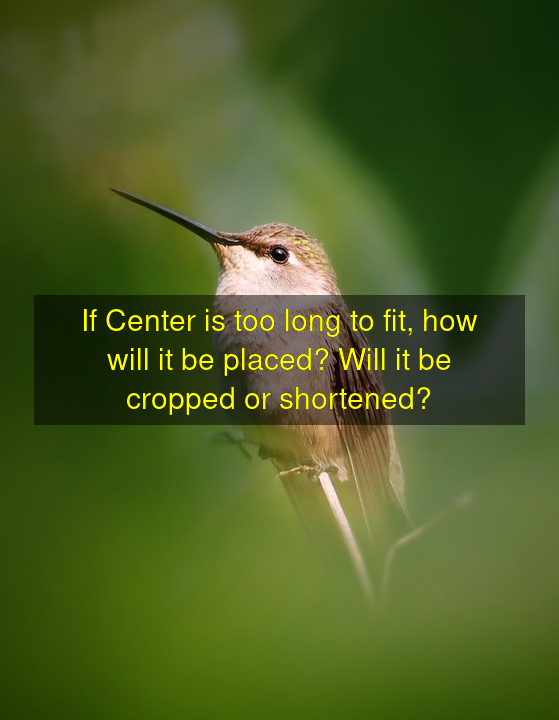

In [ ]:
# Center
center = TextClip("If Center is too long to fit, how will it be placed? Will it be cropped or shortened?",
                  fontsize=30, color='yellow', font='Arial', size = (image_width*0.8,None),method='caption')
center_width , center_height = center.size

color_clip = ColorClip(size=(int(center_width*1.1), int(center_height*1.1)),
                       color=(0, 0, 0))

color_clip = color_clip.set_opacity(.5)


center = center.set_position('center')

clip_to_overlay = CompositeVideoClip([color_clip, center])
clip_to_overlay_width , clip_to_overlay_height = clip_to_overlay.size

clip_to_overlay = clip_to_overlay.set_position((image_width/2-clip_to_overlay_width/2,image_height/2-clip_to_overlay_height/2))
# clip_to_overlay = clip_to_overlay.set_position('center')
# clip_to_overlay = clip_to_overlay.set_position('bottom')

image_clip = ImageClip(imagefile)
final_image = CompositeVideoClip([image_clip, clip_to_overlay])
final_image.save_frame('final.png')
cv2_imshow(cv2.imread('final.png'))